# Agglomerative Hierarchical Clustering:


• Start with the points as individual clusters. At each step, merge the closest pair of clusters until only one cluster is left.


• Defining inter-cluster distance/proximity:


    - single linkage - min dist between clusters
    - complete linkage - max dist between clusters

In [7]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

## Generate some random points for clustering (sklearn)

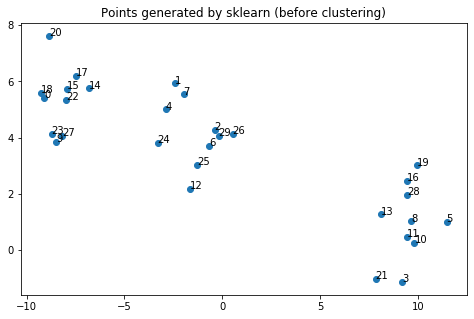

In [2]:
# generate (x,y) points (index 0 are points, index 1 are classes)
points = datasets.make_blobs(n_samples=30, random_state=7)[0]
# extract x and y as array for plotting
x, y = points.T
# label(index) of each point
labels = list(range(0, len(points), 1))

# plot the points with label
fig = plt.figure(figsize=(8, 5))
plt.scatter(x, y)
for i, txt in enumerate(labels):
    plt.annotate(txt, (x[i], y[i]))
plt.title("Points generated by sklearn (before clustering)")
plt.show()

## Run our hierarchical clustering algorithm

In [3]:
from Clustering import MyAgglomerativeClustering

# observing the plot, n_clusters is set to 3, could be any other number
clustering = MyAgglomerativeClustering(n_clusters=3, linkage='complete')

# actual clustering fitting
clustering.fit(points)

# print out the clusters (point index)
clusters = clustering.get_clusters()
for i, cluster in enumerate(clusters):
    print("cluster_{}: ".format(i), cluster)

cluster_0:  [20, 15, 22, 14, 17, 0, 18, 23, 9, 27]
cluster_1:  [24, 4, 1, 7, 12, 25, 26, 6, 2, 29]
cluster_2:  [5, 19, 16, 28, 3, 21, 13, 8, 10, 11]


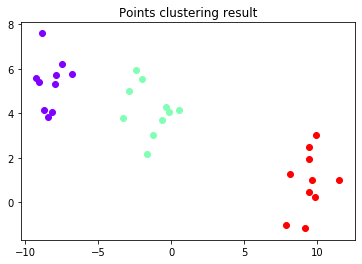

In [4]:
# plot the result, each cluster with different color
colors = cm.rainbow(np.linspace(0, 1, len(clusters)))
for i, cluster in enumerate(clusters):
    for p in cluster:
        plt.scatter(*points[p], color=colors[i])
plt.title("Points clustering result")
plt.show()

## Another interesting example - half moon

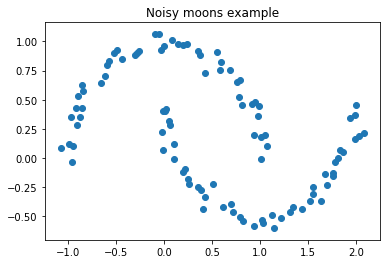

In [5]:
moons_points = datasets.make_moons(n_samples=100, noise=.05)[0]
mx, my = moons_points.T

plt.scatter(mx, my)
plt.title("Noisy moons example")
plt.show()

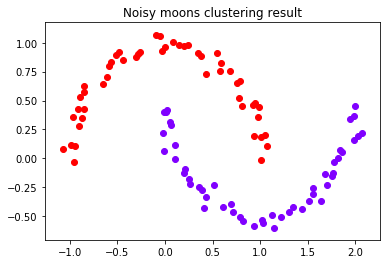

In [6]:
clustering_moons = MyAgglomerativeClustering(n_clusters=2, linkage='single')
clustering_moons.fit(moons_points)
moons = clustering_moons.get_clusters()

# plot the result, each cluster with different color
colors = cm.rainbow(np.linspace(0, 1, len(moons)))
for i, cluster in enumerate(moons):
    for p in cluster:
        plt.scatter(*moons_points[p], color=colors[i])
plt.title("Noisy moons clustering result")
plt.show()